# Classification and Clustering Exercise

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans


from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold, cross_val_score

/Library/Python/2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Importing the training and test dataset
df_train = pd.read_csv('Training.csv', sep=';')
df_test = pd.read_csv('Validation.csv', sep=';')

In [3]:
# View the current format of the data
df_train.head()

,v33,v76,v12,v68,v50,v7,v70,v55,v20,v24,...,v28,v99,v95,v42,v53,v85,v9,v84,v44,classlabel
0,v,g,"17,92",f,"1,75",a,t,80.0,"0,000054",1,...,t,c,t,800000.0,5,g,0,f,f,no.
1,v,s,"16,92",f,"0,29",b,f,200.0,"0,0000335",0,...,f,k,NaN,2000000.0,0,p,1,f,f,no.
2,ff,g,"31,25",f,0,b,t,96.0,"0,0001125",1,...,f,ff,t,960000.0,19,g,0,f,f,no.
3,o,g,"48,17",f,"0,335",a,f,0.0,"0,0001335",0,...,f,i,NaN,0.0,120,g,1,f,f,no.
4,v,g,"32,33",t,"0,5",b,f,232.0,"0,00035",0,...,t,k,f,2320000.0,0,g,1,f,f,no.


In [4]:
columns = df_train.columns
for column in columns:
    try:
        f_val = float(str(df_train[column][0]).replace(',','.'))
        if type(f_val) is float:
            df_train[column] = df_train[column].apply(lambda x: float(str(x).replace(',','.')))
            df_test[column] = df_test[column].apply(lambda x: float(str(x).replace(',','.')))
    except Exception as e:
        pass

In [5]:
df_train.head()

,v33,v76,v12,v68,v50,v7,v70,v55,v20,v24,...,v28,v99,v95,v42,v53,v85,v9,v84,v44,classlabel
0,v,g,17.92,f,1.750,a,t,80.0,0.000054,1.0,...,t,c,t,800000.0,5.0,g,0.0,f,f,no.
1,v,s,16.92,f,0.290,b,f,200.0,0.000034,0.0,...,f,k,NaN,2000000.0,0.0,p,1.0,f,f,no.
2,ff,g,31.25,f,0.000,b,t,96.0,0.000112,1.0,...,f,ff,t,960000.0,19.0,g,0.0,f,f,no.
3,o,g,48.17,f,0.335,a,f,0.0,0.000133,0.0,...,f,i,NaN,0.0,120.0,g,1.0,f,f,no.
4,v,g,32.33,t,0.500,b,f,232.0,0.000350,0.0,...,t,k,f,2320000.0,0.0,g,1.0,f,f,no.


In [6]:
df_train.dtypes

v33            object
v76            object
v12           float64
v68            object
v50           float64
v7             object
v70            object
v55           float64
v20           float64
v24           float64
v32            object
v97           float64
v28            object
v99            object
v95            object
v42           float64
v53           float64
v85            object
v9            float64
v84            object
v44            object
classlabel     object
dtype: object

In [7]:
categorical = df_train.dtypes[df_train.dtypes == "object"].index
train_missing = {}
test_missing = {}
for c in categorical:
    train_m = np.where(df_train[c].isnull() == True)
    test_m = np.where(df_test[c].isnull() == True)
    if len(train_m[0]) > 0:
        train_missing[c] = {'length':len(train_m[0])}
    if len(test_m[0]) > 0:
        test_missing[c] = {'length':len(test_m[0])}

print pd.DataFrame(train_missing.items()).head()
print pd.DataFrame(test_missing.items()).head()

     0                  1
0  v32    {u'length': 64}
1  v33    {u'length': 66}
2  v95  {u'length': 2145}
3  v99    {u'length': 66}
4   v7    {u'length': 39}
     0                 1
0  v32    {u'length': 2}
1  v33    {u'length': 3}
2  v95  {u'length': 111}
3  v99    {u'length': 3}
4   v7    {u'length': 3}


In [8]:
del df_train['v95']
del df_test['v95']

categorical = df_train.dtypes[df_train.dtypes == "object"].index
train_missing = {}
test_missing = {}
for c in categorical:
    train_m = np.where(df_train[c].isnull() == True)
    test_m = np.where(df_test[c].isnull() == True)
    if len(train_m[0]) > 0:
        train_missing[c] = {'length':len(train_m[0])}
    if len(test_m[0]) > 0:
        test_missing[c] = {'length':len(test_m[0])}
print train_missing.keys()
print test_missing.keys()

['v85', 'v99', 'v32', 'v33', 'v7']
['v85', 'v99', 'v32', 'v33', 'v7']


In [9]:
mappings_train = {}
mappings_test = {}
for key in train_missing.keys():
    mappings_train[key] = df_train[key].value_counts()._index[0]
    mappings_test[key] = df_test[key].value_counts()._index[0]
print mappings_train
print mappings_test

{'v85': 'g', 'v32': 'u', 'v99': 'c', 'v33': 'v', 'v7': 'b'}
{'v85': 'g', 'v32': 'u', 'v99': 'c', 'v33': 'v', 'v7': 'b'}


In [10]:
for k in mappings_train:
    df_train[k].fillna(mappings_train[k], inplace=True)
    df_test[k].fillna(mappings_train[k], inplace=True)

categorical = df_train.dtypes[df_train.dtypes == "object"].index
num_missing = {}
for c in categorical:
    missing = np.where(df_train[c].isnull() == True)
    if len(missing[0]) > 0:
        num_missing[c] = {'length':len(missing[0]), "missing":missing}
num_missing.keys()


[]

In [11]:
train_any_nan_cols = df_train.columns[df_train.isnull().any()]
test_any_nan_cols = df_test.columns[df_test.isnull().any()]
print train_any_nan_cols 
print test_any_nan_cols

Index([u'v12', u'v55', u'v42'], dtype='object')
Index([u'v12', u'v55', u'v42'], dtype='object')


In [12]:
for c in train_any_nan_cols:
    df_train[c].fillna(df_train[c].mean(), inplace=True)
    df_test[c].fillna(df_test[c].mean(), inplace=True)
    
train_any_nan_cols = df_train.columns[df_train.isnull().any()]
test_any_nan_cols = df_test.columns[df_test.isnull().any()]
print train_any_nan_cols 
print test_any_nan_cols

Index([], dtype='object')
Index([], dtype='object')


In [13]:
df_train.head()

,v33,v76,v12,v68,v50,v7,v70,v55,v20,v24,...,v97,v28,v99,v42,v53,v85,v9,v84,v44,classlabel
0,v,g,17.92,f,1.750,a,t,80.0,0.000054,1.0,...,2.82,t,c,800000.0,5.0,g,0.0,f,f,no.
1,v,s,16.92,f,0.290,b,f,200.0,0.000034,0.0,...,3.45,f,k,2000000.0,0.0,p,1.0,f,f,no.
2,ff,g,31.25,f,0.000,b,t,96.0,0.000112,1.0,...,3.24,f,ff,960000.0,19.0,g,0.0,f,f,no.
3,o,g,48.17,f,0.335,a,f,0.0,0.000133,0.0,...,4.21,f,i,0.0,120.0,g,1.0,f,f,no.
4,v,g,32.33,t,0.500,b,f,232.0,0.000350,0.0,...,3.44,t,k,2320000.0,0.0,g,1.0,f,f,no.


In [14]:

categorical = df_train.dtypes[df_train.dtypes == "object"].index
categorical

Index([u'v33', u'v76', u'v68', u'v7', u'v70', u'v32', u'v28', u'v99', u'v85',
       u'v84', u'v44', u'classlabel'],
      dtype='object')

In [15]:
df_train_cpy = df_train.copy()
df_test_cpy = df_test.copy()
for c in categorical:
    df_train_cpy[c] = df_train_cpy[c].astype('category')
    df_test_cpy[c] = df_test_cpy[c].astype('category')
    df_train_cpy[c] = df_train_cpy[c].cat.codes
    df_test_cpy[c] = df_test_cpy[c].cat.codes
df_train_cpy.head()

,v33,v76,v12,v68,v50,v7,v70,v55,v20,v24,...,v97,v28,v99,v42,v53,v85,v9,v84,v44,classlabel
0,7,0,17.92,0,1.750,0,1,80.0,0.000054,1.0,...,2.82,1,2,800000.0,5.0,0,0.0,0,0,0
1,7,2,16.92,0,0.290,1,0,200.0,0.000034,0.0,...,3.45,0,9,2000000.0,0.0,2,1.0,0,0,0
2,2,0,31.25,0,0.000,1,1,96.0,0.000112,1.0,...,3.24,0,6,960000.0,19.0,0,0.0,0,0,0
3,6,0,48.17,0,0.335,0,0,0.0,0.000133,0.0,...,4.21,0,7,0.0,120.0,0,1.0,0,0,0
4,7,0,32.33,1,0.500,1,0,232.0,0.000350,0.0,...,3.44,1,9,2320000.0,0.0,0,1.0,0,0,0


In [16]:
df_test_cpy.head()

,v33,v76,v12,v68,v50,v7,v70,v55,v20,v24,...,v97,v28,v99,v42,v53,v85,v9,v84,v44,classlabel
0,0,2,32.33,1,1.585,1,0,420.0,0.000750,0.0,...,4.33,1,5,4200000.0,0.0,0,1.0,0,1,0
1,6,0,23.58,0,0.540,1,0,136.0,0.000179,0.0,...,4.37,1,2,1360000.0,1.0,0,0.0,0,0,0
2,6,0,36.42,1,0.585,1,0,240.0,0.000075,0.0,...,3.79,0,4,2400000.0,3.0,1,1.0,0,0,0
3,6,0,18.42,0,0.125,1,0,120.0,0.001042,0.0,...,3.61,0,1,1200000.0,375.0,1,0.0,1,0,0
4,6,0,24.50,1,0.040,1,0,120.0,0.001334,0.0,...,3.68,1,1,1200000.0,475.0,1,0.0,0,0,0


In [17]:
X_train = df_train_cpy.drop("classlabel", axis=1)
Y_train = df_train_cpy["classlabel"]
X_test  = df_test_cpy.drop("classlabel", axis=1)
Y_test = df_test_cpy["classlabel"]
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape


((3700, 20), (3700,), (200, 20), (200,))

In [18]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc_log

46.5

In [19]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc_svc

59.0

In [20]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc_knn

64.5

In [21]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc_gaussian

69.0

In [22]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc_perceptron

/Library/Python/2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


45.5

In [23]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc_linear_svc

51.5

In [24]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc_sgd

/Library/Python/2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


46.5

In [25]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc_decision_tree

50.5

In [26]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc_random_forest

51.5

In [27]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Naive Bayes,69.0
1,KNN,64.5
0,Support Vector Machines,59.0
3,Random Forest,51.5
7,Linear SVC,51.5
8,Decision Tree,50.5
2,Logistic Regression,46.5
6,Stochastic Gradient Decent,46.5
5,Perceptron,45.5


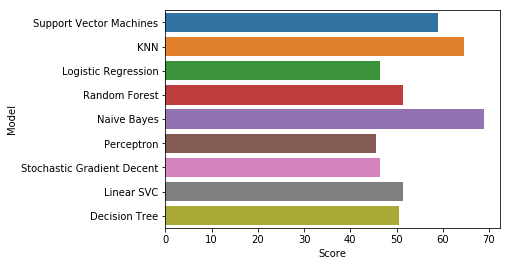

In [28]:
sns.barplot(x='Score', y='Model', data=models)

In [29]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)

pca = PCA(0.95)

pca.fit(X_train)

pca.n_components_

X_train = pca.transform(X_train)

X_train = pd.DataFrame(X_train)

In [30]:
scaler = StandardScaler()

scaler.fit(X_test)

X_test = scaler.transform(X_test)

pca = PCA(0.95)

pca.fit(X_test)

pca.n_components_

X_test = pca.transform(X_test)

X_test= pd.DataFrame(X_test)

In [31]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc_knn

48.5

In [32]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc_decision_tree

49.0

In [33]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc_random_forest

47.5

In [34]:
# creating odd list of K for KNN
neighbors = filter(lambda x: x % 2 != 0, list(range(1,50)))
# empty list that will hold cv scores
cv_scores = {}

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores[k] = scores.mean()

In [35]:
bess_k = max(cv_scores, key=lambda k: cv_scores[k])
bess_k

3

In [36]:
# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=bess_k)

# fitting the model
knn.fit(X_train, Y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
acc_knn = round(accuracy_score(Y_test,Y_pred) * 100, 2)
acc_knn

47.5